# Principal Component Analysis utilizando `sklearn`

Este notebook sirve como complemento a la clase 4 (Dimensionality Reduction) y tiene como fin ilustrar cómo se calcula la PCA para una matriz de entrada sencilla con 6 muestras y 2 variables. Utilizaremos la librería `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Comenzamos definiendo la matriz y representándola gráficamente.

Input data:


,V1,V2
0,10,6
1,11,4
2,8,5
3,3,3
4,1,2
5,2,1


<AxesSubplot:xlabel='V1', ylabel='V2'>

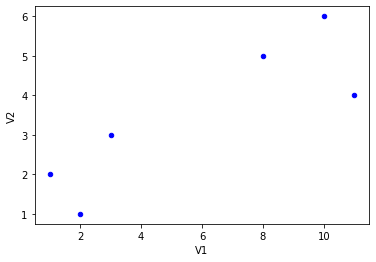

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'V1': [10, 11, 8, 3, 1, 2],
    'V2': [6, 4, 5, 3, 2, 1]
})

print("Input data:")
display(df)

df.plot.scatter(x = 'V1', y = 'V2', c = 'blue')

Como vimos, la matriz de entrada debe centrarse (restar a cada valor la media de su columna/variable) antes de aplicar la PCA. Hacemos esto y representamos de nuevo el resultado gráficamente. Aunque ha cambiado la localización de los puntos, las posiciones relativas entre ellas son exactamente las mismas.

Centered data:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,V1,V2
0,4.166667,2.5
1,5.166667,0.5
2,2.166667,1.5
3,-2.833333,-0.5
4,-4.833333,-1.5
5,-3.833333,-2.5


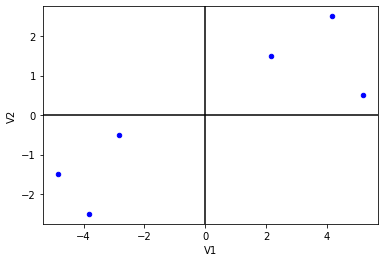

In [2]:
df.centered = df - df.mean()

print("Centered data:")
display(df.centered)

df.centered.plot.scatter(x = 'V1', y = 'V2', c = 'blue')
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

Ahora utilizamos la función `PCA` de sklearn para hacer el cálculo de las componentes principales y transformar los datos de entrada utilizando `fit_transform`. Podemos utilizar como entrada el DataFrame original sin centrar puesto que la librería se encarga de ello, tal y como dice en su documentación: *The input data is centered but not scaled for each feature before applying the SVD.*. En el DataFrame `points` tendremos los datos transformados al nuevo espacio.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points = pca.fit_transform(df)
points = pd.DataFrame(points)
points.columns = ['PC1', 'PC2']

print("Transformed data:")
display(points)

Transformed data:


,PC1,PC2
0,-4.783923,-0.851580
1,-5.005804,1.373452
2,-2.558891,-0.629699
3,2.825563,-0.542192
4,5.050595,-0.320312
5,4.472460,0.970332


Vamos a analizar el resto de resultados asociados a la PCA. En primer lugar, la variable `pca.components_` alberga los pesos de las componentes (loadings o weights). `components_` tiene las componentes en filas y las variables de entrada en columnas.

In [4]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])

print("PCA Loadings:")
display(loadings)

PCA Loadings:


,PC1,PC2
0,-0.934389,0.356254
1,-0.356254,-0.934389


Dado que ambas componentes son ortogonales, podemos comprobar que su producto escalar es 0:

In [5]:
import numpy as np

dotProduct = np.dot(loadings['PC1'],loadings['PC2'])
print("The dot product of the loadings is: ", dotProduct)

The dot product of the loadings is:  0.0


El resultado de la PCA también contiene tres variables con la varianza explicada y el porcentaje de varianza explicada por cada componente. Imprimimos estos valores y, a mayores, el porcentaje de varianza acumulada. Recuerda que las componentes están ordenadas decrecientemente por porcentaje de varianza explicada, ya que la primera componente es la que mayor porcentaje de varianza explica.

In [6]:
print("La varianza explicada por cada componente es: ", str(pca.explained_variance_))
print("El porcentaje de varianza explicada por cada componente es: ", str(pca.explained_variance_ratio_))
print("El acumulado del porcentaje de varianza explicada por cada componente es: ", str(pca.explained_variance_ratio_.cumsum()))

La varianza explicada por cada componente es:  [21.59742733  0.86923933]
El porcentaje de varianza explicada por cada componente es:  [0.96130982 0.03869018]
El acumulado del porcentaje de varianza explicada por cada componente es:  [0.96130982 1.        ]


Es instructivo comprobar cómo estas varianzas se pueden obtener a partir de la matriz de datos transformados (`points`). Calculamos las varianzas utilizando la fórmula y utilizando la función `var` del pandas DataFrame.

In [7]:
print("La varianza de PC1 es:")
display(sum(points['PC1'] * points['PC1']) / 5)

print("\nLa varianza de PC2 es:")
display(sum(points['PC2'] * points['PC2']) / 5)

print("\nLa varianza de PC1 y PC2 es:")
display(points.var(axis = 0))

La varianza de PC1 es:


21.59742733350742


La varianza de PC2 es:


0.869239333159249


La varianza de PC1 y PC2 es:


PC1    21.597427
PC2     0.869239
dtype: float64

Y para terminar con las varianzas, hacemos un `scree plot`: un gráfico de barras donde representamos el porcentaje de varianza explicad por cada PC.

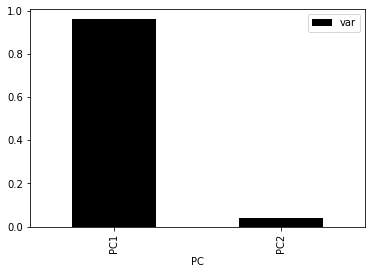

In [8]:
var = pd.DataFrame({'var': pca.explained_variance_ratio_, 'PC':['PC1','PC2']})
var.plot.bar(x='PC', y="var", color="black");

Para acabar con el ejemplo, vamos a representar gráficamente las componentes principales y los datos transformados al nuevo espacio. Empezamos visualizando la matriz de datos de entrada (utilizamos la versión centrada) y representamos sobre ella las dos líneas que corresponden a las componentes principales.

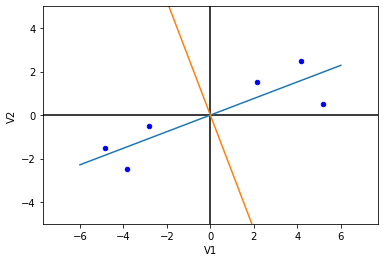

In [9]:
import numpy as np

df.centered.plot.scatter(x = 'V1', y = 'V2', c = 'blue')

# Make sure the axis have the same graphical scale to appreciate that the two lines are orthogonal
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Draw the axis at 0
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')

# Draw the horizontal line for PC1. The intercept is 0 and the slope is the ratio between the PC loadings.

i=0 # intercept
s=loadings['PC1'][1]/loadings['PC1'][0] # slope
x=np.linspace(-6,6,50)
plt.plot(x, s*x + i)

# Draw the horizontal line for PC1. The intercept is 0 and the slope is the ratio between the PC loadings.
i=0 # intercept
s=loadings['PC2'][1]/loadings['PC2'][0] # slope
# s = -1/s # We know PC2 is orthogonal to PC1, so we could compute PC2's slope this way
x=np.linspace(-2,2,50)
plt.plot(x, s*x + i)

Y ahora hacemos el scatterplot de la matriz de datos transformada. Como se puede ver, la mayor variación está en el eje asociado a PC1, pues es donde los puntos se dispersan más.

Transformed data:


,PC1,PC2
0,-4.783923,-0.851580
1,-5.005804,1.373452
2,-2.558891,-0.629699
3,2.825563,-0.542192
4,5.050595,-0.320312
5,4.472460,0.970332


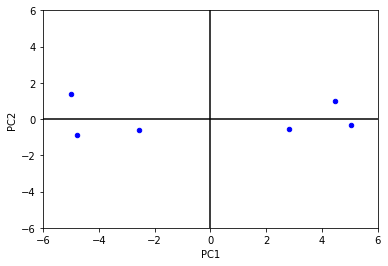

In [10]:
print("Transformed data:")
display(points)

points.plot.scatter(x = 'PC1', y = 'PC2', c = 'blue')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')